In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### The global sales trend compared to the number of games on each year

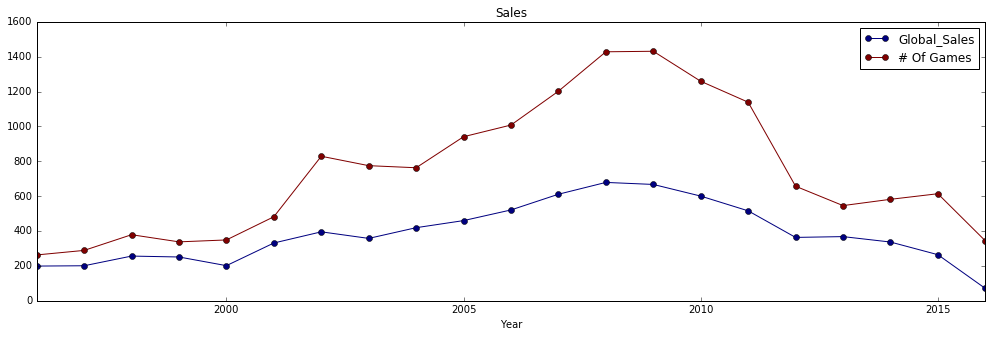

In [6]:
%matplotlib inline

(
    data.query("Year>1995 and Year<2017")
    .groupby('Year')
    .agg({'Global_Sales':'sum','Rank':'count'})
    .rename(columns={'Rank':'# Of Games'})
    .plot(kind='line',figsize=(17,5), cmap='jet', title='Sales',marker='o')
)


In [7]:
x = data.query("Platform in ('XOne','PS4')").groupby(['Year','Platform']).agg({'Global_Sales':'sum','Name':'count'}
                                                                             ).rename(columns={'Name':'Count'})

In [9]:
x.unstack()

Global_Sales         Count      
Platform          PS4   XOne    PS4  XOne
Year                                     
2013.0          24.76  18.60   16.0  19.0
2014.0          98.76  52.43   75.0  61.0
2015.0         115.30  57.66  137.0  79.0
2016.0          39.25  12.37  107.0  54.0
2017.0           0.03    NaN    1.0   NaN

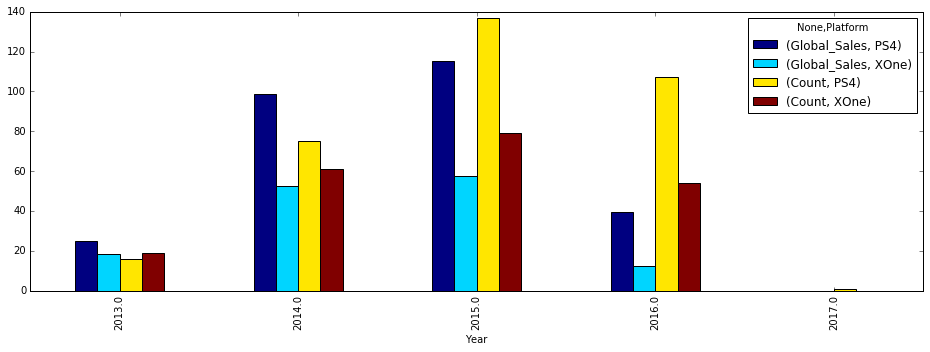

In [10]:
x.unstack().plot(kind='bar', cmap='jet',figsize=(16,5))

### Which Genre is popular in each market

              NA_Sales  EU_Sales  Other_Sales  JP_Sales
Genre                                                  
Action          877.83    525.00       187.38    159.95
Adventure       105.80     64.13        16.81     52.07
Fighting        223.59    101.32        36.68     87.35
Misc            410.24    215.98        75.32    107.76
Platform        447.05    201.63        51.59    130.77
Puzzle          123.78     50.78        12.55     57.31
Racing          359.42    238.39        77.27     56.69
Role-Playing    327.28    188.06        59.61    352.31
Shooter         582.60    313.27       102.69     38.28
Simulation      183.31    113.38        31.52     63.70
Sports          683.35    376.85       134.97    135.37
Strategy         68.70     45.34        11.36     49.46


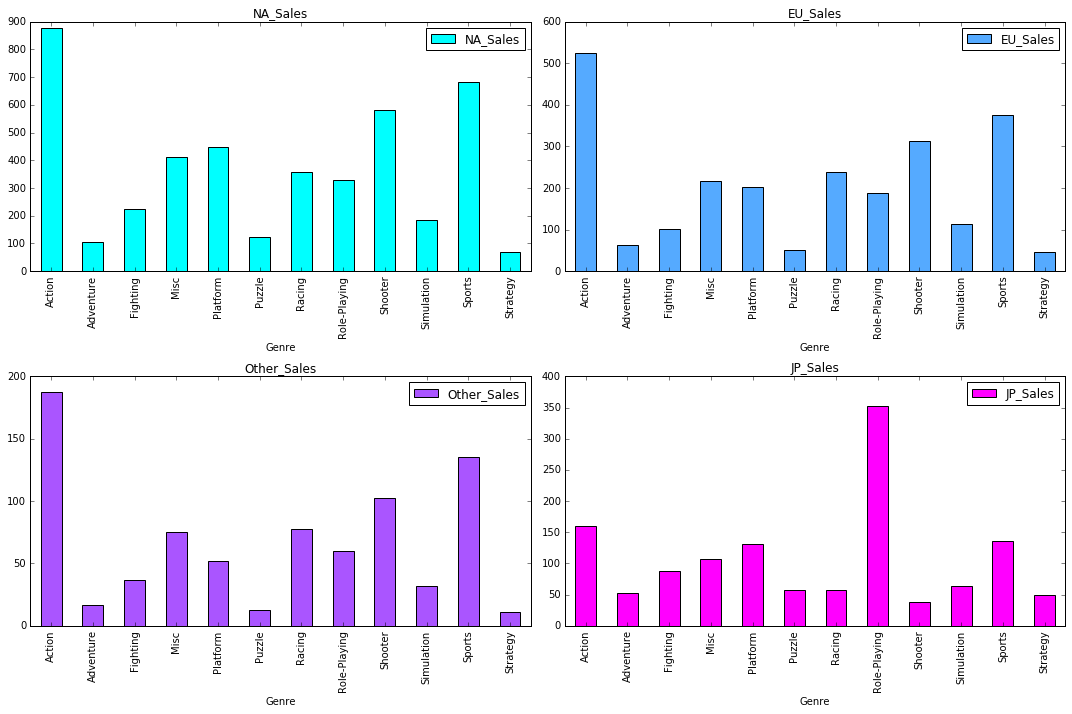

In [11]:
data.groupby(['Genre']).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum'}
                           ).plot(kind='bar', figsize=(15,10), subplots=True, sharex=False, layout=(2,2),cmap='cool')


d = data.groupby(['Genre']).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum'}
                           )
print d
plt.tight_layout()

In [1]:
# Encoding the non numerical values

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
labels = {}
enc = LabelEncoder()
one = LabelBinarizer()

In [2]:
a = ['Genre','Platform','Publisher','Year','Year', 'Platform']
enc.fit_transform(a)


array([0, 1, 2, 3, 3, 1], dtype=int64)

In [3]:
one.fit_transform(a)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [22]:
for col in ['Genre','Platform','Publisher','Year']: 
    data[col] = enc.fit_transform(data[col])
    labels[col] = enc.classes_




In [1]:
 labels[0]

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
data.fillna(0)
features = data[['Genre','Platform','Publisher']]
label = data['JP_Sales']

NameError: name 'data' is not defined

In [11]:
train_features,test_features,train_labels,test_labels = train_test_split(features,label)

In [12]:
cls = RandomForestRegressor(n_estimators=100,n_jobs=3)
cls.fit(train_features,train_labels)
cls.score(test_features,test_labels)

0.20575312044191418

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
cls = GradientBoostingRegressor(learning_rate=0.8)
cls.fit(train_features,train_labels)
cls.score(test_features,test_labels)

0.21576894015949666